color magnitude diagram
==

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

In [2]:
# Daten einlesen
if 0: 
    r_3d,m1,m2,mv,mbmv,mv1,mbmv1,mv2,mbmv2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\BA Stand 13.11\Bachelorarbeit\\x-y-z.dat', usecols=(1,9,10,21,22,24,25,27,28,30,31,32), unpack=True)
else:
    r_3d,m1,m2,mv,mbmv,mv1,mbmv1,mv2,mbmv2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,21,22,24,25,27,28,30,31,32), unpack=True)


In [3]:
mass=np.zeros(len(r_3d)) #mass of binary system
mass=m1+m2
np.max(mass) #black hole is going to be excluded by starting from index 1

10102.0

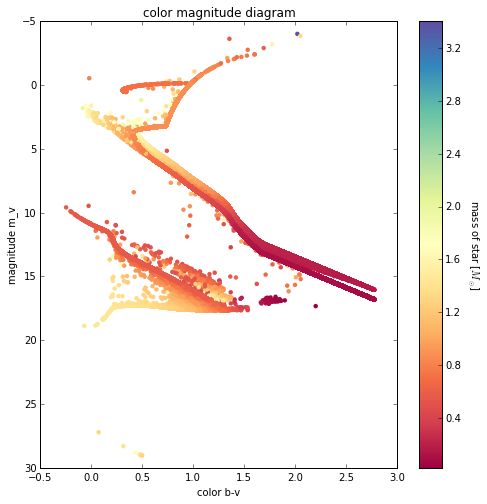

In [4]:
#color magnitude diagram for the binary stellar system
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cax=ax.scatter(mbmv[1:],mv[1:],c=mass[1:],cmap='Spectral',edgecolor="None")
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('mass of star [$M_\odot$]', rotation=270)
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram')
#plt.savefig('Plots/color_magnitude_diagram')

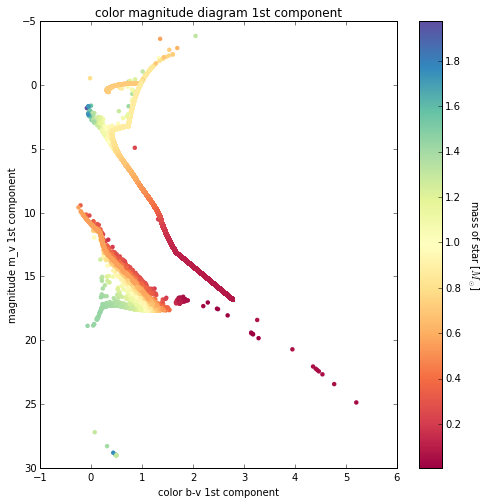

In [5]:
#color magnitude diagram for the first component of the binary system
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax1=ax.scatter(mbmv1[1:],mv1[1:],c=m1[1:],cmap='Spectral',edgecolor="None")
cbar1 = fig.colorbar(cax1)
cbar1.ax.get_yaxis().labelpad = 20
cbar1.set_label('mass of star [$M_\odot$]', rotation=270)
ax.set_xlabel('color b-v 1st component')
ax.set_ylabel('magnitude m_v 1st component')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram 1st component')
#plt.savefig('Plots/color_magnitude_diagram_1st_component')

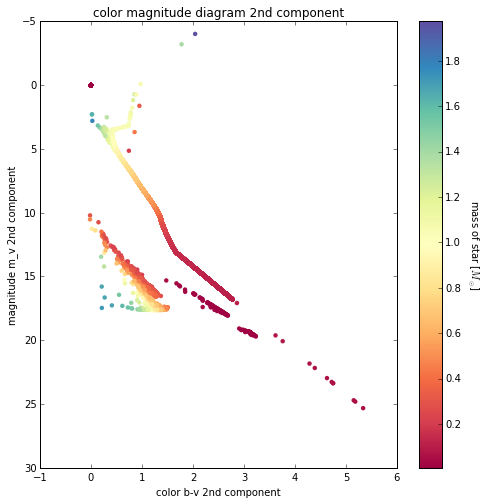

In [6]:
#color magnitude for the secoond component of the binary system
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax2=ax.scatter(mbmv2[1:],mv2[1:],c=m2[1:],cmap='Spectral',edgecolor="None")
cbar2 = fig.colorbar(cax1)
cbar2.ax.get_yaxis().labelpad = 20
cbar2.set_label('mass of star [$M_\odot$]', rotation=270)
ax.set_xlabel('color b-v 2nd component')
ax.set_ylabel('magnitude m_v 2nd component')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram 2nd component')
#plt.savefig('Plots/color_magnitude_diagram_2nd_component')

cmd with isochrones
===

In [7]:
#m_ini,m_act,mb_is,mv_is,es=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\BA Stand 13.11\Bachelorarbeit\isochrones\iso_10Gyr_0.001.dat', usecols=(2,3,9,10,17), unpack=True)
#m_ini2,m_act2,mb_is2,mv_is2,es2=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\BA Stand 13.11\Bachelorarbeit\isochrones\iso_10Gyr_0.00076.dat', usecols=(2,3,9,10,17), unpack=True)

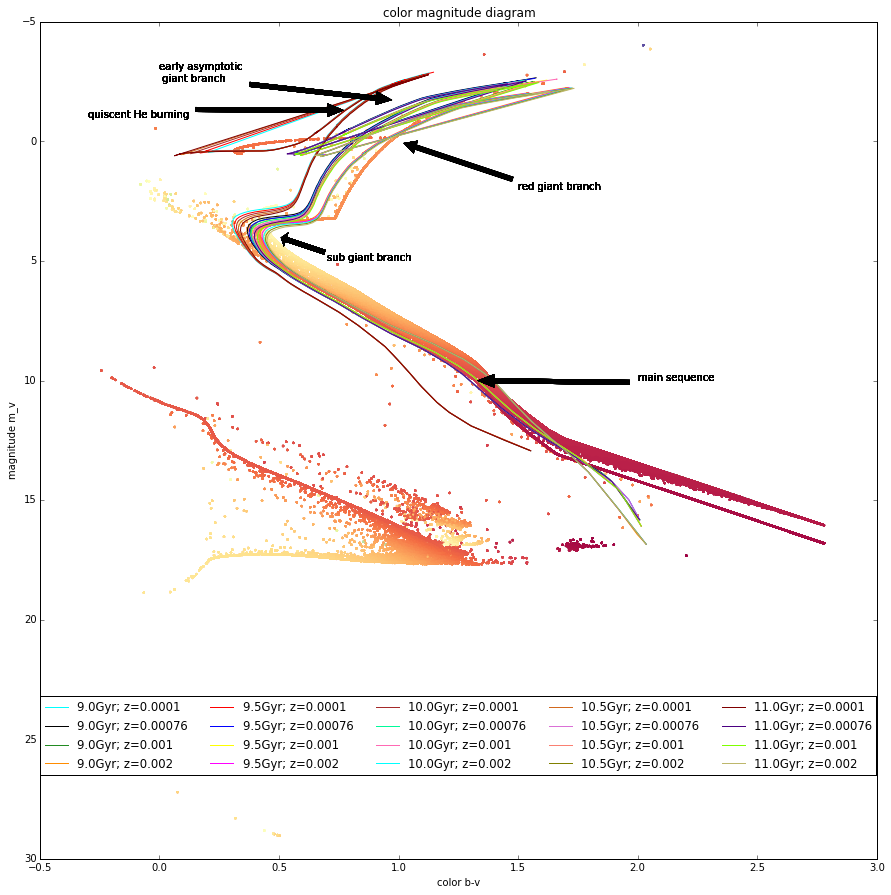

In [23]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

age=np.array([int(9),int(9),int(9),int(9),9.5,9.5,9.5,9.5,10,10,10,10,10.5,10.5,10.5,10.5,11,11,11,11])
zt=np.array([0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002])
for i in range(20):
    m_ini,m_act,mb_is,mv_is,es=np.loadtxt('/home/milanov/Bachelorarbeit/isochrones/iso_'+str(age[i])+"Gyr_"+str(zt[i])+'.dat', usecols=(2,3,9,10,17), unpack=True)
    m_ini=m_ini[:-1]
    m_act=m_act[:-1]
    mb_is=mb_is[:-1]
    mv_is=mv_is[:-1]
    es=es[:-1]
    mbmv_is=mb_is-mv_is
    cax=ax.scatter(mbmv[1:],mv[1:],c=mass[1:],marker='.',edgecolor="None",cmap="Spectral")
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta','brown', 'MediumSpringGreen','hotpink','cyan','chocolate','orchid','salmon','olive','maroon','indigo','chartreuse','darkkhaki']
    
    cax_is=ax.plot(mbmv_is,mv_is,c=colors[i],label=str(age[i])+'Gyr; z='+str(zt[i]))
    
    ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('quiscent He burning',xy=(0.8,-1.3),xytext=(-0.3,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('early asymptotic \n giant branch',xy=(1.0,-1.7),xytext=(0.0,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
#    ax.annotate('thermally pulsing \n asymptotic giant \n branch',xy=(1.6,-2.5),xytext=(1.9,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.set_xlabel('color b-v')
    ax.set_ylabel('magnitude m_v')
    ax.set_ylim(30,-5)
    ax.set_title('color magnitude diagram')
    ax.legend(loc=(0.,0.1),ncol=5,numpoints=1, prop={'size':11.6})
fig.savefig('color_magnitude_diagram_with_iscochrones')
    


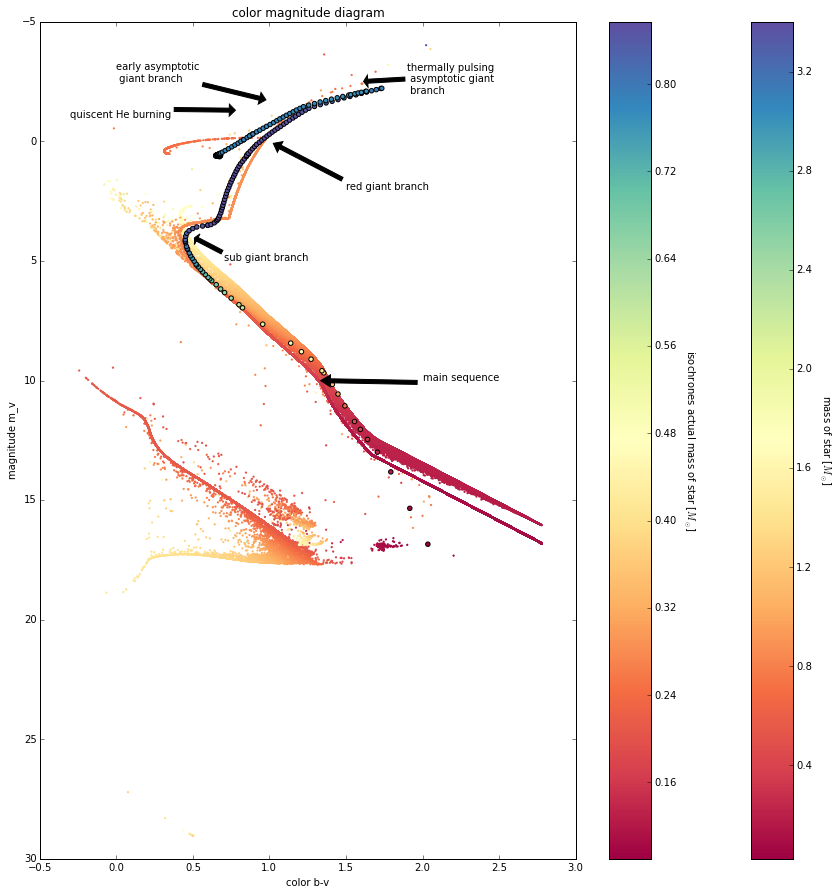

In [16]:
#color magnitude diagram for the binary stellar system
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

cax=ax.scatter(mbmv[1:],mv[1:],c=mass[1:],marker='.',edgecolor="None",cmap="Spectral")
cax_is=ax.scatter(mbmv_is,mv_is,c=m_act,cmap='Spectral')
#cax2_is=ax.scatter(mbmv_is2,mv_is2,c=m_act2,cmap='Spectral')
cbar = fig.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.set_label('mass of star [$M_\odot$]', rotation=270)
cbar_is=fig.colorbar(cax_is)
cbar_is.ax.get_yaxis().labelpad = 20
cbar_is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('quiscent He burning',xy=(0.8,-1.3),xytext=(-0.3,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('early asymptotic \n giant branch',xy=(1.0,-1.7),xytext=(0.0,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('thermally pulsing \n asymptotic giant \n branch',xy=(1.6,-2.5),xytext=(1.9,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones')

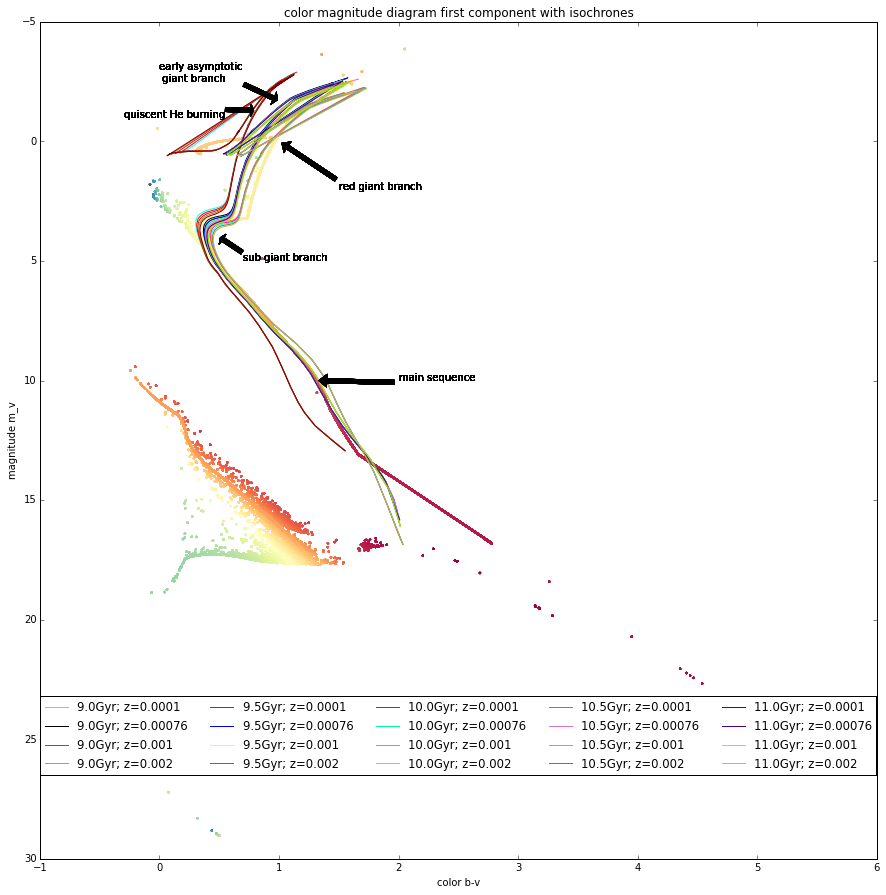

In [24]:
#color magnitude diagram for the first component
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

#cax_1=ax.scatter(mbmv1[1:],mv1[1:],c=m1[1:],marker='.',edgecolor="None",cmap="Spectral")
#cax_1is=ax.scatter(mbmv_is,mv_is,c=m_act,cmap='Spectral')
#cbar_1 = fig.colorbar(cax_1)
#cbar_1.ax.get_yaxis().labelpad = 20
#cbar_1.set_label('mass of star [$M_\odot$]', rotation=270)
#cbar_1is=fig.colorbar(cax_1is)
#cbar_1is.ax.get_yaxis().labelpad = 20
#cbar_1is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

#ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('quiscent \nHe burning',xy=(0.8,-1.0),xytext=(-0.6,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('early asymptotic \ngiant branch',xy=(1.0,-1.7),xytext=(-0.5,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('thermally pulsing \nasymptotic giant \nbranch',xy=(1.8,-2.5),xytext=(2.5,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.set_xlabel('color b-v')
#ax.set_ylabel('magnitude m_v')
#ax.set_ylim(30,-5)
#ax.set_title('color magnitude diagram first component with isochrones')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones_first_component')


age=np.array([int(9),int(9),int(9),int(9),9.5,9.5,9.5,9.5,10,10,10,10,10.5,10.5,10.5,10.5,11,11,11,11])
zt=np.array([0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002])
for i in range(20):
    m_ini,m_act,mb_is,mv_is,es=np.loadtxt('/home/milanov/Bachelorarbeit/isochrones/iso_'+str(age[i])+"Gyr_"+str(zt[i])+'.dat', usecols=(2,3,9,10,17), unpack=True)
    m_ini=m_ini[:-1]
    m_act=m_act[:-1]
    mb_is=mb_is[:-1]
    mv_is=mv_is[:-1]
    es=es[:-1]
    mbmv_is=mb_is-mv_is
    cax=ax.scatter(mbmv1[1:],mv1[1:],c=m1[1:],marker='.',edgecolor="None",cmap="Spectral")
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta','brown', 'MediumSpringGreen','hotpink','cyan','chocolate','orchid','salmon','olive','maroon','indigo','chartreuse','darkkhaki']
    
    cax_is=ax.plot(mbmv_is,mv_is,c=colors[i],label=str(age[i])+'Gyr; z='+str(zt[i]))
    
    ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('quiscent He burning',xy=(0.8,-1.3),xytext=(-0.3,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('early asymptotic \n giant branch',xy=(1.0,-1.7),xytext=(0.0,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
#    ax.annotate('thermally pulsing \n asymptotic giant \n branch',xy=(1.6,-2.5),xytext=(1.9,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.set_xlabel('color b-v')
    ax.set_ylabel('magnitude m_v')
    ax.set_ylim(30,-5)
    ax.set_title('color magnitude diagram first component with isochrones')
    ax.legend(loc=(0.,0.1),ncol=5,numpoints=1,prop={'size':11.6})
fig.savefig('color_magnitude_diagram_first_component_with_iscochrones')
    


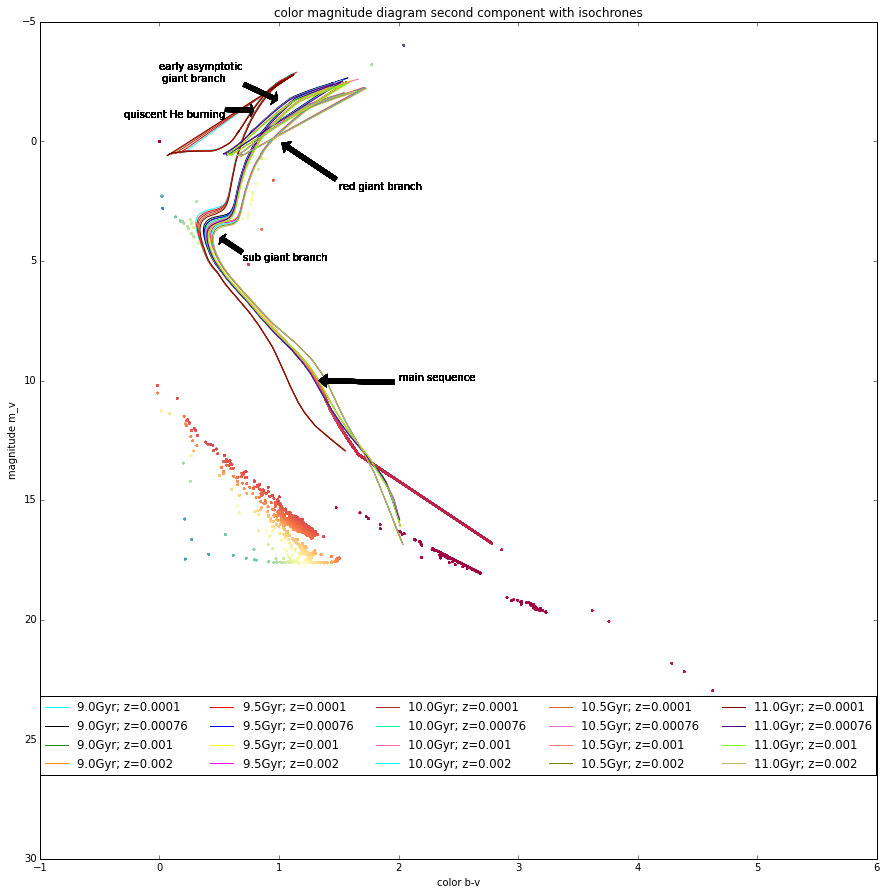

In [25]:
#color magnitude diagram for the second component
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

#cax_2=ax.scatter(mbmv2[1:],mv2[1:],c=m2[1:],marker='.',edgecolor="None",cmap="Spectral")
#cax_2is=ax.scatter(mbmv_is,mv_is,c=m_act,cmap='Spectral')
#cbar_2 = fig.colorbar(cax_2)
#cbar_2.ax.get_yaxis().labelpad = 20
#cbar_2.set_label('mass of star [$M_\odot$]', rotation=270)
#cbar_2is=fig.colorbar(cax_2is)
#cbar_2is.ax.get_yaxis().labelpad = 20
#cbar_2is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

#ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('quiscent \nHe burning',xy=(0.8,-1.0),xytext=(-0.6,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('early asymptotic \ngiant branch',xy=(1.0,-1.7),xytext=(-0.5,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('thermally pulsing \nasymptotic giant \nbranch',xy=(1.8,-2.5),xytext=(2.5,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.set_xlabel('color b-v')
#ax.set_ylabel('magnitude m_v')
#ax.set_ylim(30,-5)
#ax.set_title('color magnitude diagram second component with isochrones')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones_secons_component')


age=np.array([int(9),int(9),int(9),int(9),9.5,9.5,9.5,9.5,10,10,10,10,10.5,10.5,10.5,10.5,11,11,11,11])
zt=np.array([0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002,0.0001,0.00076,0.001,0.002])
for i in range(20):
    m_ini,m_act,mb_is,mv_is,es=np.loadtxt('/home/milanov/Bachelorarbeit/isochrones/iso_'+str(age[i])+"Gyr_"+str(zt[i])+'.dat', usecols=(2,3,9,10,17), unpack=True)
    m_ini=m_ini[:-1]
    m_act=m_act[:-1]
    mb_is=mb_is[:-1]
    mv_is=mv_is[:-1]
    es=es[:-1]
    mbmv_is=mb_is-mv_is
    cax=ax.scatter(mbmv2[1:],mv2[1:],c=m2[1:],marker='.',edgecolor="None",cmap="Spectral")
    
    colors=['aqua','black','forestgreen','darkorange','red','blue','yellow','magenta','brown', 'MediumSpringGreen','hotpink','cyan','chocolate','orchid','salmon','olive','maroon','indigo','chartreuse','darkkhaki']
    
    cax_is=ax.plot(mbmv_is,mv_is,c=colors[i],label=str(age[i])+'Gyr; z='+str(zt[i]))
    
    ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('quiscent He burning',xy=(0.8,-1.3),xytext=(-0.3,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('early asymptotic \n giant branch',xy=(1.0,-1.7),xytext=(0.0,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
#    ax.annotate('thermally pulsing \n asymptotic giant \n branch',xy=(1.6,-2.5),xytext=(1.9,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
    ax.set_xlabel('color b-v')
    ax.set_ylabel('magnitude m_v')
    ax.set_ylim(30,-5)
    ax.set_title('color magnitude diagram second component with isochrones')
    ax.legend(loc=(0.,0.1),ncol=5,numpoints=1,prop={'size':11.6})
fig.savefig('color_magnitude_diagram_second_component_with_iscochrones')
    

NameError: name 'mbmv_is2' is not defined

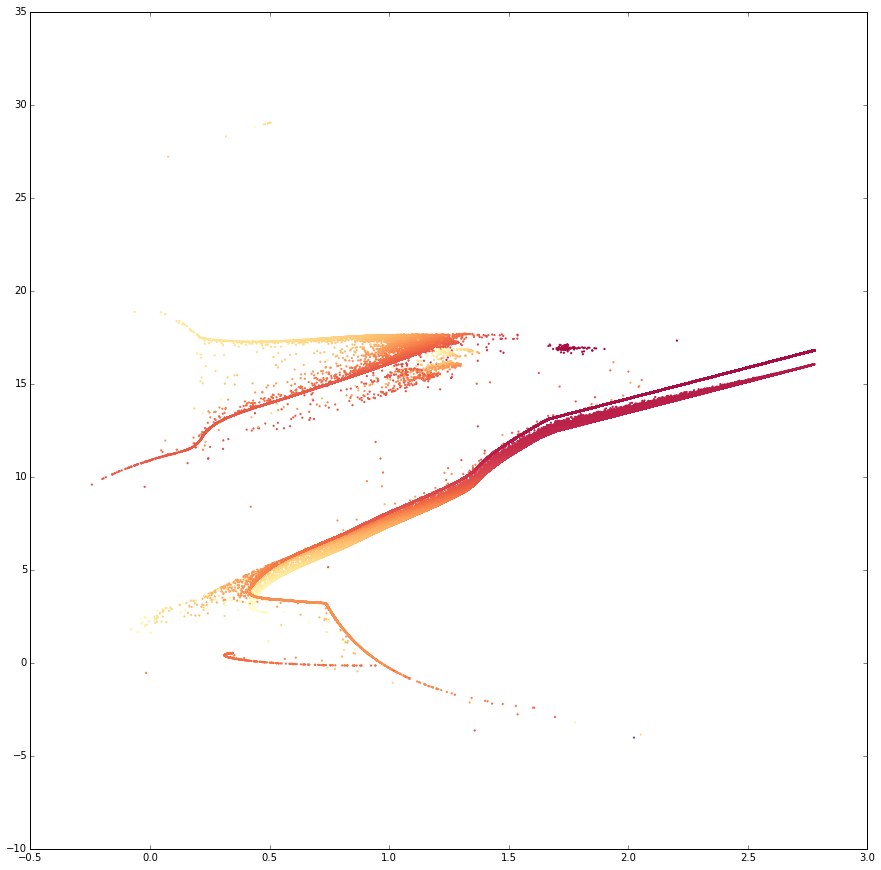

In [19]:
#color magnitude diagram for the binary stellar system
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

cax2=ax.scatter(mbmv[1:],mv[1:],c=mass[1:],marker='.',edgecolor="None",cmap="Spectral")
cax2_is2=ax.scatter(mbmv_is2,mv_is2,c=m_act2,cmap='Spectral')
cbar2 = fig.colorbar(cax2)
cbar2.ax.get_yaxis().labelpad = 20
cbar2.set_label('mass of star [$M_\odot$]', rotation=270)
cbar_is2=fig.colorbar(cax2_is2)
cbar_is2.ax.get_yaxis().labelpad = 20
cbar_is2.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('quiscent He burning',xy=(0.8,-1.3),xytext=(-0.3,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('early asymptotic \n giant branch',xy=(1.0,-1.7),xytext=(0.0,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('thermally pulsing \n asymptotic giant \n branch',xy=(1.6,-2.5),xytext=(1.9,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones')

In [ ]:
#color magnitude diagram for the first component
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

cax2_1=ax.scatter(mbmv1[1:],mv1[1:],c=m1[1:],marker='.',edgecolor="None",cmap="Spectral")
cax2_1is=ax.scatter(mbmv_is2,mv_is2,c=m_act2,cmap='Spectral')
cbar2_1 = fig.colorbar(cax2_1)
cbar2_1.ax.get_yaxis().labelpad = 20
cbar2_1.set_label('mass of star [$M_\odot$]', rotation=270)
cbar2_1is=fig.colorbar(cax2_1is)
cbar2_1is.ax.get_yaxis().labelpad = 20
cbar2_1is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('quiscent \nHe burning',xy=(0.8,-1.0),xytext=(-0.6,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('early asymptotic \ngiant branch',xy=(1.0,-1.7),xytext=(-0.5,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('thermally pulsing \nasymptotic giant \nbranch',xy=(1.8,-2.5),xytext=(2.5,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram first component with isochrones')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones_first_component')

In [ ]:
#color magnitude diagram for the second component
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

cax2_2=ax.scatter(mbmv2[1:],mv2[1:],c=m2[1:],marker='.',edgecolor="None",cmap="Spectral")
cax2_2is=ax.scatter(mbmv_is2,mv_is2,c=m_act2,cmap='Spectral')
cbar2_2 = fig.colorbar(cax2_2)
cbar2_2.ax.get_yaxis().labelpad = 20
cbar2_2.set_label('mass of star [$M_\odot$]', rotation=270)
cbar2_2is=fig.colorbar(cax2_2is)
cbar2_2is.ax.get_yaxis().labelpad = 20
cbar2_2is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('quiscent \nHe burning',xy=(0.8,-1.0),xytext=(-0.6,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('early asymptotic \ngiant branch',xy=(1.0,-1.7),xytext=(-0.5,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('thermally pulsing \nasymptotic giant \nbranch',xy=(1.8,-2.5),xytext=(2.5,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram second component with isochrones')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones_secons_component')

In [ ]:
#color magnitude diagram for the second component
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)


points = np.array([mbmv_is2, mv_is2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments, cmap="Spectral",norm=plt.Normalize(0, 10))
lc.set_array(z)
lc.set_linewidth(1)

cax2_2=ax.scatter(mbmv2[1:],mv2[1:],c=m2[1:],marker='.',edgecolor="None",cmap="Spectral")
#cax2_2is=ax.pcolormesh(X,Y,C)
fig.gca().add_collection(lc)
cbar2_2 = fig.colorbar(cax2_2)
cbar2_2.ax.get_yaxis().labelpad = 20
cbar2_2.set_label('mass of star [$M_\odot$]', rotation=270)
#cbar2_2is=fig.colorbar(cax2_2is)
#cbar2_2is.ax.get_yaxis().labelpad = 20
#cbar2_2is.set_label('isochrones actual mass of star [$M_\odot$]', rotation=270)

ax.annotate('main sequence',xy=(1.3,10),xytext=(2.,10),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('sub giant branch',xy=(0.5,4),xytext=(0.7,5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('red giant branch',xy=(1.0,0.0),xytext=(1.5,2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('quiscent \nHe burning',xy=(0.8,-1.0),xytext=(-0.6,-1.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('early asymptotic \ngiant branch',xy=(1.0,-1.7),xytext=(-0.5,-2.5),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('thermally pulsing \nasymptotic giant \nbranch',xy=(1.8,-2.5),xytext=(2.5,-2.0),arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('color b-v')
ax.set_ylabel('magnitude m_v')
ax.set_ylim(30,-5)
ax.set_title('color magnitude diagram second component with isochrones')
#plt.savefig('Plots/color_magnitude_diagram_with_iscochrones_secons_component')

#linie richtig mit farben plotten